#### Softmax Temperature

##### References
- https://github.com/sascha-kirch/ML_Notebooks/blob/main/Softmax_Temperature.ipynb
- https://note.com/raccmot/n/nd2eaeb272b33

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

In [2]:
def plot(labels, logits, title):
    logits = logits.tolist()[0]
    fig, ax = plt.subplots()
    colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
    ax.bar(labels, logits, color=colors)
    ax.set_title(title)

    plt.show()

def temp_softmax(logits, temperature=1.0, dim=-1):
    """
    Computes the softmax with a temperature parameter.
    
    Args:
        logits (torch.Tensor): The input tensor (logits).
        temperature (float): The temperature parameter. Default is 1.0.
        dim (int): The dimension along which softmax will be computed. Default is -1.
        
    Returns:
        torch.Tensor: The softmax probabilities with temperature scaling.
    """
    # Apply temperature scaling
    scaled_logits = logits / temperature
    # Apply softmax
    return F.softmax(scaled_logits, dim=dim)

In [3]:
logits = [
    0.4,
    0.3,
    0.1,
    0.02,
    0.38,
    0.18,
    0.44,
    0.22,
    0.59,
]
logits = torch.tensor([logits])

temperature = 1.0
softmax_output = temp_softmax(logits, temperature)
print(softmax_output)
print(torch.softmax(logits, dim=1))

tensor([[0.1220, 0.1104, 0.0904, 0.0834, 0.1196, 0.0979, 0.1270, 0.1019, 0.1475]])
tensor([[0.1220, 0.1104, 0.0904, 0.0834, 0.1196, 0.0979, 0.1270, 0.1019, 0.1475]])


***
##### Baseline

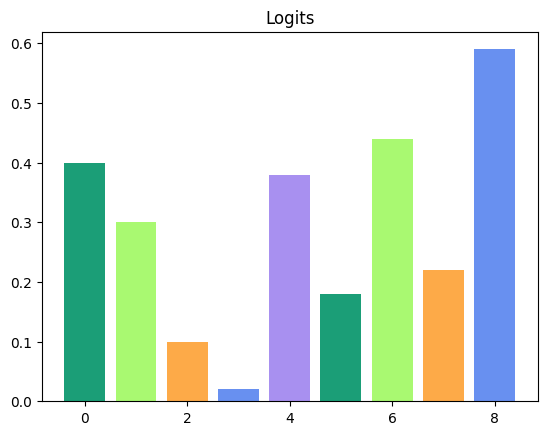

In [4]:
labels = [i for i in range(len(logits[0]))]
plot(labels, logits, "Logits")

***
##### Different temperature values

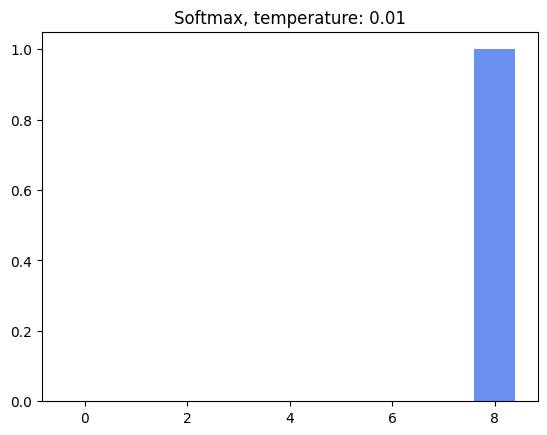

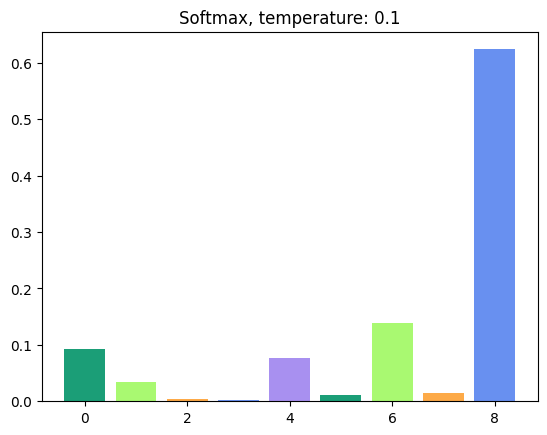

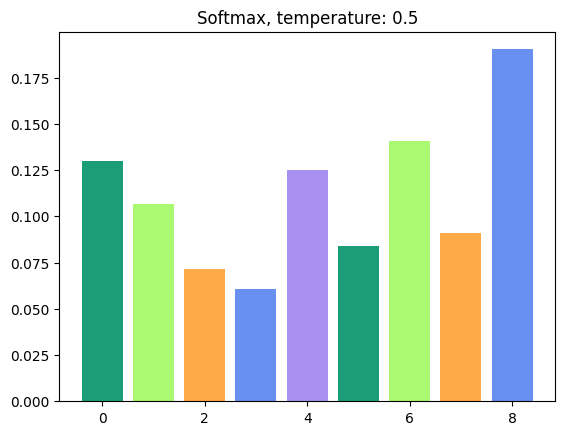

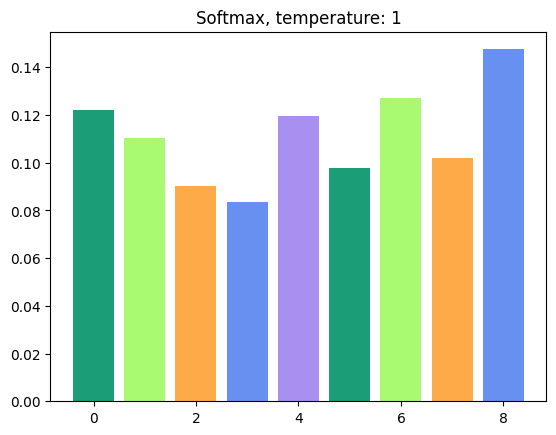

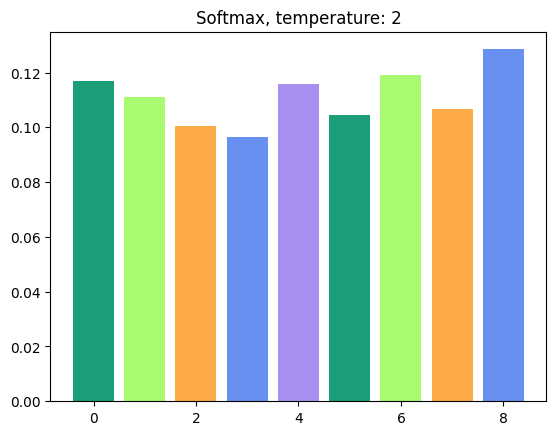

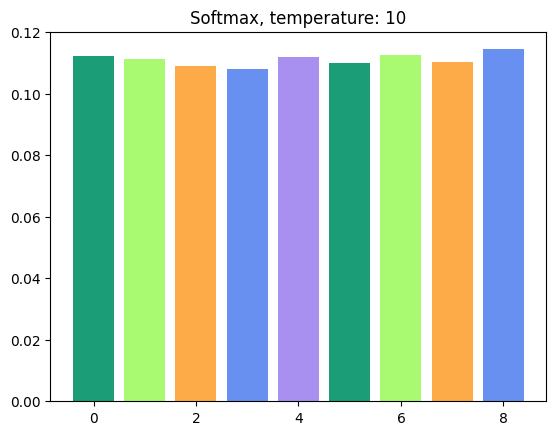

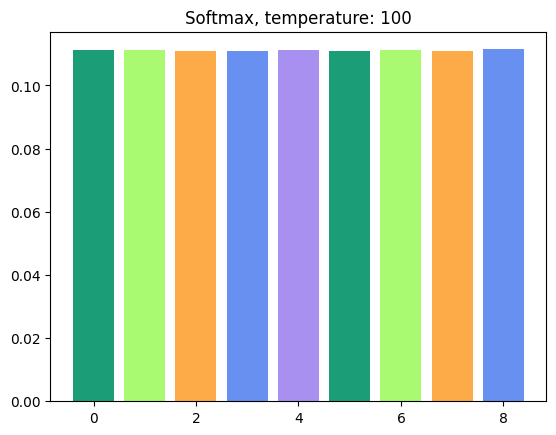

In [5]:
temps = [0.01, 0.1, 0.5, 1, 2, 10, 100]
for temp in temps:
  sm = temp_softmax(logits, temp)
  plot(labels, sm, f"Softmax, temperature: {temp}")

***
##### Summary
- T=1 : the usual softmax function itself.
- T>1 : the output probability distribution becomes flatter and the probability more uniform.
- 0<T<1 : the output probability distribution is sharper and the probability of the class corresponding to the highest score is greater.